Библиометрический анализ журнала Feminist Economics


#Описание проекта

Цель проекта: провести библиометрический анализ международного научного журнала Feminist Economics с целью выявления основных тенденций развития научного направления Феминистская экономика (Экономика гендера). 


Описание данных: 
Спарсила с сайта редакции всю информацию о статьях и авторах. 
'Volume' Том (сквозная нумерация)
'Issue' Выпуск
'Issue_title' Название выпуска - есть в специальных выпусках
'Year' Год выпуска - с 1995 до 2022 
'Article_number' номер статьи - особенно важно, какая тема будет под номером один
'Title' - заглавие статьи - тоже полезно для определния тем
'Author1' -ФИО первого автора
'Author1_Info' - инфо о первом авторе. Из инфо можно извлечь страну, город, университет, факультет, номер ORCID  
'Author1_Contacts'- город и университет для авторов - так как для первых выпусков не было info
'Pages' номера страниц журнала - можно вычислить продолжительность статьи - но это будет не очень точно. Лучше количество знаков или слов. А на количество страниц могут влиять таблицы и рисунки и прочие приложения. Выделить первую статью в каждом номере и обратить на нее особое внимание
'Date_published' дата онлайн публикации статьи
'DOI' номер DOI
'Abstract' - текст аннотации статьи 
'Highlights' -  основные тезисы статьи. Есть только в последней трети статей. Наверное легче удалить
'Keywords' - ключевые слова
'JEL codes' - посмотреть какие области экономических наук покрывает направление feminist economics 
'Views' - количество просмотров статьи на сайте - выделить самые популярные темы
'CrossRef'- количество ссылок на эту статью в научной литературе
'Almetric' -  колчисевто ссылок на эту статью в сми и соцсетях
'References' - список цитируемой литературы
'Citations' - список статей, процитировавших эту статью 
'WOS' - число цитат в базе данных Web of Science 
'Scopus' число цитат в Скопусе 
'Open_access' - 1 означает, что статья бесплатная, 0 - платная 
'lemmatized_text' - лемматизированный текст
'lemmatized_tokens лемматизированные токены 

Задачи и методы проекта: 


1. Выявить основные темы статей журнала на основе анализа аннотаций всех выпусков статьей (28 лет, 4 выпуска в год. После парсинга данных в табличке стало 925 строчек)
Методы: были испробованы методы кластеризации, LDA, но они не показали хороших и интерпретируемых результатов. Самой удачной вышла модель TF IDF 
TF-IDF (term frequency - inverse document frequency) — статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции.

Мера TF-IDF часто используется в задачах анализа текстов и информационного поиска, например, как один из критериев релевантности документа поисковому запросу, при расчёте меры близости документов при кластеризации.

IDF не показала интересных результатов при использовании с одним словом. Поэтому попробовала посмотреть со словосочетаниями. 

Основные темы также можно посмотреть по ключевым словам и также посмотреть как они менялись по годам и сравнить с результатами анализа аннотаций 
Посмотреть темы по заглавиям статей 

2. Посмотреть, как менялись словосочетания по годам 
Сгруппировать таблицу по годам, объединить аннотации и посмотреть tf idf
Сделано 

3. Посмотреть контекст использования основных терминов, определяющих темы, таких как 
feminist / feminism, gender, 

Не сделано 

4. Посмотреть как связаны темы и авторы, особенно страны проживания и университеты, где работают авторы.  

5. Ключевые слова. Классифицировать ключевые слова и выделить оттуда названия стран, методы анализа и темы - сделано 

6. Посмотреть какие темы опубликуются в первой статье каждого выпуска журнала как самые главные с точки зрения редакции 

7. Построить линейную регрессию, предсказывающую популярность статьи и посмотреть, как это связано с темами (сделать дамми из самых важных слов и словосочетаний)

8. Посмотреть какие темы (авторы, университеты) самые цитируемые в науке/ в сми

#Библиотеки и данные

In [1]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from tqdm import tqdm
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


import itertools
import networkx as nx
import spacy
from spacy.lang.en.examples import sentences 

from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


pd.set_option('display.max_columns', None)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sofiarebrey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sofiarebrey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sofiarebrey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sofiarebrey/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
df = pd.read_excel('tandfonline-02.xlsx')
df

,Volume,Issue,Issue_title,Year,Article_number,Title,Author1,Author1_Info,Author1_Contacts,Author2,Author2_Info,Author2_Contacts,Author3,Author3_Info,Author3_Contacts,Author4,Author4_Info,Author4_Contacts,Author5,Author5_Info,Author5_Contacts,Author6,Author6_Info,Author6_Contacts,Author7,Author7_Info,Author7_Contacts,Author8,Author8_Info,Author8_Contacts,Author9,Author9_Info,Author9_Contacts,Author10,Author10_Info,Author10_Contacts,Pages,Date_published,DOI,Abstract,Highlights,Keywords,JEL codes,Views,CrossRef,Almetric,References,Citations,WOS,Scopus,Open_access
0,1,1,NaN,1995,9689203,Creating a forum for feminist economic inquiry,Diana Strassmann,NaN,"Center for Cultural Studies, Rice University",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-5,18 Jun 2010,https://doi.org/10.1080/714042211,NaN,NaN,NaN,NaN,123,14,0,NaN,Sheba Tejani. (2019) What’s feminist about fem...,0.0,15.0,1
1,1,1,NaN,1995,9689204,Can feminist thought make economics more objec...,Sandra Harding,NaN,"Departments of Philosophy, University of Delaw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7-32,18 Jun 2010,https://doi.org/10.1080/714042212,Feminist research is often perceived to be les...,NaN,"Feminism,method,objectivity,philosophy of econ...",NaN,467,47,0,NaN,"Sarah Averi Albala, Frida Kasteng, Arne Hennin...",0.0,87.0,1
2,1,1,NaN,1995,9689205,Robinson Crusoe: The quintessential economic man?,Ulla Grapard,NaN,"Department of Economics, Colgate University, 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33-52,18 Jun 2010,https://doi.org/10.1080/714042213,The tale of Robinson Crusoe strikes a responsi...,NaN,"Robinson Crusoe, homo economics,self-sufficien...",NaN,845,19,0,NaN,Nancy Folbre. (2020) Manifold exploitations: t...,0.0,58.0,1
3,1,1,NaN,1995,9689206,What difference does gender make? Rethinking p...,Carmen Diana Deere,NaN,"Department of Economics, University of Massach...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53-72,18 Jun 2010,https://doi.org/10.1080/714042214,This article argues that gender analysis has c...,NaN,"Peasants,gender,Latin American rural women,con...",NaN,238,30,0,NaN,"Grettel Navas. (2022) ‘If there's no evidence,...",0.0,40.0,1
4,1,1,NaN,1995,9689207,"""Holding hands at midnight"": The paradox of ca...",Nancy Folbre,NaN,"Department of Economics, University of Massach...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73-92,18 Jun 2010,https://doi.org/10.1080/714042215,This paper puts recent feminist theorizing abo...,NaN,"Caring,labor,family,policy,altruism,reciprocity",NaN,842,145,25,NaN,"Özlem Onaran, Cem Oyvat, Eurydice Fotopoulou. ...",0.0,189.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,28,1,NaN,2022,1976808,Seasonal Migration and Feminization of Farm Ma...,S. Chandrasekhar,S. Chandrasekhar is Professor at Indira Gandhi...,a Indira Gandhi Institute of Development Resea...,Soham Sahoo,Soham Sahoo is Assistant Professor at the Cent...,b Indian Institute of Management Bangalore – C...,Hema Swaminathan,Hema Swaminathan is Associate Professor at the...,c Indian Institute of Management Bangalore – C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86-113,07 Nov 2021,https://doi.org/10.1080/13545701.2021.1976808,NaN,the importance of unpacking the feminization ...,"Feminization of agriculture,women farm manager...","Q1, R2, J1",160,0,0,"Agarwal, Bina.2018. “Can Group Farms Outperfor...",NaN,0.0,0.0,0
920,28,1,NaN,2022,1983190,Gender Gaps in Wages and Mortality Rates Durin...,Pilar Beneito,Pilar Beneito holds an M

#Abstract

In [3]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() 


In [4]:
# С помощью регулярных выражений оставляем только слова и слова, написанные через дефис и 
# и делаем нижний регистр, а также проводим лемматизацию и очищаем от стоп-слов 

def clean(text):
    tokens = re.findall('\w+-?\w*', text.lower())
    tokens = [lemmatizer.lemmatize(tok) for tok in tokens if tok not in stop_words]
    return ' '.join(tokens)


Всего аннотаций 731 из 995, потому что часть статей - это рецензии на книги, у них нет аннотаций. Убираем пустые значения

In [5]:
#Оставляем только непустые значения аннотаций, чистим и токенизируем аннотации
df = df[~df.Abstract.isna()]
df['lemmatized_text'] = df['Abstract'].apply(clean)
df['lemmatized_tokens'] = df['lemmatized_text'].apply(lambda x: x.split())

<ipython-input-5-2da3356dc7ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_text'] = df['Abstract'].apply(clean)
<ipython-input-5-2da3356dc7ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_tokens'] = df['lemmatized_text'].apply(lambda x: x.split())


In [6]:
abstract_list=df['lemmatized_tokens'].tolist()
tf_idf_vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)
cv_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)

tf_idf_vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)
cv_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
tf_idf_arr = tf_idf_vectorizer.fit_transform(abstract_list)
cv_arr = cv_vectorizer.fit_transform(abstract_list)



In [7]:
#Составляем словари в векторизованном виде

vocab_tf_idf = tf_idf_vectorizer.get_feature_names()
vocab_cv = cv_vectorizer.get_feature_names()



In [8]:
abstract_list

[['feminist',
  'research',
  'often',
  'perceived',
  'le',
  'objective',
  'conventional',
  'research',
  'ground',
  'latter',
  'value-neutral',
  'former',
  'essay',
  'show',
  'major',
  'problem',
  'familiar',
  'standard',
  'maximizing',
  'objectivity',
  'permit',
  'conclusion',
  'weak',
  'resource',
  'detecting',
  'widespread',
  'cultural',
  'assumption',
  'value',
  'interest',
  'androcentric',
  'one',
  'feminist',
  'work',
  'draw',
  'attention',
  'good',
  'method',
  'work',
  'identifying',
  'cultural',
  'value',
  'differ',
  'researcher',
  'research',
  'community',
  'however',
  'since',
  'androcentric',
  'value',
  'often',
  'culture-wide',
  'something',
  'rigorous',
  'conventional',
  'good',
  'method',
  'evidently',
  'needed',
  'researcher',
  'able',
  'identify',
  'thus',
  'feminist',
  'research',
  'introduce',
  'political',
  'assumption',
  'value',
  'interest',
  'research',
  'field',
  'otherwise',
  'value-neutral',

In [9]:
#Генерируем 100 возможных тем, которые будут описывать тексты

TOPIC_NUM = 100
lda_model = LatentDirichletAllocation(n_components = TOPIC_NUM, max_iter = 20, random_state = 42)
X_topics = lda_model.fit_transform(tf_idf_arr)
topic_words = lda_model.components_

In [10]:
#Каждая тема будет состоять из 5 самых популярных слов

n_top_words = 5

topics = {}

for i, topic_dist in enumerate(topic_words):
    sorted_topic_dist = np.argsort(topic_dist)
    topic_words = np.array(vocab_tf_idf)[sorted_topic_dist]
    topic_words = topic_words[:-n_top_words:-1]
    topics[i+1] = topic_words

In [11]:
#Собираем темы для каждого текста и генерируем дамми признаки на основе ключевых слов 
#каждой темы

all_topics = []

doc_topic = lda_model.transform(tf_idf_arr)  
for n in range(doc_topic.shape[0]):
    topic_doc = doc_topic[n].argmax()
    _t = [t for t in list(topics[topic_doc+1]) if len(t) > 2]
    all_topics.append(",".join(_t))

df_topics = pd.DataFrame(np.array(all_topics))
df_topics = df_topics[0].str.get_dummies(',')
df_topics

,2001,2002,abortion,absence,academic,access,acms,acquisition,addressing,affordable,afghan,african,african-american,agenda,agricultural,agriculture-nutrition,aimed,alliance,altruistic,american,anti-market,anti-racist,applied,appropriate,argument,ask,attitude,australian,authorship,automatism,autonomy,available,avert,badgett,baltic,basic,beauty,becker,bedouin,benefit,big,bill,black,boundary,boundary-crossing,breastfeeding,budget,canada,capacity,capital,caput,care,center,centrality,child,claim,clerical,cohort,collective,commodification,communicated,comparative,comparing,complexity,concentrated,concentration,concept,consciousness-raising,consent,consumption,content,correlation,couple,covid-19,credit,criminalizes,critique,crop,cross-border,crusoe,cua,culture,cycle,democratization,deprivation,developmental,devoted,differential,disadvantage,district,divorce,domain,dormitory,dutch,duty,earnings,ecology,economy,ecuadorian,educational,effect,elderly,elite,empathy,empowering,endogeneity,enforce,enhance,environmental,equality,equity,establishment,ethnic,europe,exchange,exists,expansionary,expenditure,explanation,exposed,extended,factory,fairness,far,farm,father,female-dominated,femecon,feminism,feminization,field,filipina,financial,firm-financed,fishery,formulation,free,fringe,full-time,fully,galicia,gdi,gdp,gender,gender-advocacy,gender-just,gendered,generation,german,germany,gii,giving,global,good,grab,graduate,grandchild,greece,gross,group,guatemala,harding,healthcare,heightened,heterodox,hierarchy,historical,home-based,housework,hsas,identity,immigrant,impact,improved,inconsistent,increased,increasing,indirect,industry-level,informal,inheritance,institutionalist,intangible,interconnected,international,internationalist,intersectional,intra-household,introductory,investment,ipv,iranian,joint,journal,keynesian,labor,land,later,leader,leave,left,lesbianism,lfp,light,link,literacy,lone,looking,loss,love,low-skill,lunch,mainstream,male-dominated,managerial,manufacturing,marriage,marxist,mental,migrant,mill,modified,month,moreover,mother,naturalized,neoliberal,network,nicaragua,non-economics,nonfarm,nonmarket,nursing,occurred,off-farm,on-line,organization,pandemic-recovery,parents-in,part-,part-time,pathway,patriarchal,peasant,pension,per,percentage,performance,pilot,pittsburgh,poetry,point,polygamous,polygynous,pose,position,post,poverty,precarity,premium,prevention,price,pro-market,pro-women,process,product,profession,program,promote,property,proposal,prose,quality,raising,rank,rawls,reality,receiving,reciprocity,reflection,reform,relation,relativity,remain,remit,remittance,representation,residential,salary,satisfaction,save,saving,scenario,schedule,schooling,second,security,serious,servant,sex,sexual,shed,sigi,significance,significantly,simply,single,skilled,smith,sociocultural,son,ssa,statistically,stature,stereotype,stigma,stigmatize,still,struggle,style,substantial,success,supplement,surname,taking,taller,tax,teenager,text,theoretical,theory,therefore,threatens,title,trade,trafficking,training,transition,turin,two-sex,undervaluation,unexplained,unilateral,unionization,unless,valuation,village,violence,waring,water,web,website,west,whose,woman,work,younger
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [89]:
df_topics = pd.DataFrame(np.array(all_topics))


In [90]:
df_topics

,0
0,"divorce,caput,per,economy"
1,"precarity,crusoe,anti-racist,marxist"
2,"peasant,consciousness-raising,pro-women,educat..."
3,"anti-market,pro-market,undervaluation,institut..."
4,"concept,basic,global,center"
...,...
726,"woman,gender,work,labor"
727,"occurred,empowering,aimed,exposed"
728,"woman,gender,work,labor"
729,"property,graduate,culture,raising"


In [92]:
df_topics = pd.DataFrame(np.array(all_topics))
df_topics[0].str.get_dummies(',')


,2001,2002,abortion,absence,academic,access,acms,acquisition,addressing,affordable,afghan,african,african-american,agenda,agricultural,agriculture-nutrition,aimed,alliance,altruistic,american,anti-market,anti-racist,applied,appropriate,argument,ask,attitude,australian,authorship,automatism,autonomy,available,avert,badgett,baltic,basic,beauty,becker,bedouin,benefit,big,bill,black,boundary,boundary-crossing,breastfeeding,budget,canada,capacity,capital,caput,care,center,centrality,child,claim,clerical,cohort,collective,commodification,communicated,comparative,comparing,complexity,concentrated,concentration,concept,consciousness-raising,consent,consumption,content,correlation,couple,covid-19,credit,criminalizes,critique,crop,cross-border,crusoe,cua,culture,cycle,democratization,deprivation,developmental,devoted,differential,disadvantage,district,divorce,domain,dormitory,dutch,duty,earnings,ecology,economy,ecuadorian,educational,effect,elderly,elite,empathy,empowering,endogeneity,enforce,enhance,environmental,equality,equity,establishment,ethnic,europe,exchange,exists,expansionary,expenditure,explanation,exposed,extended,factory,fairness,far,farm,father,female-dominated,femecon,feminism,feminization,field,filipina,financial,firm-financed,fishery,formulation,free,fringe,full-time,fully,galicia,gdi,gdp,gender,gender-advocacy,gender-just,gendered,generation,german,germany,gii,giving,global,good,grab,graduate,grandchild,greece,gross,group,guatemala,harding,healthcare,heightened,heterodox,hierarchy,historical,home-based,housework,hsas,identity,immigrant,impact,improved,inconsistent,increased,increasing,indirect,industry-level,informal,inheritance,institutionalist,intangible,interconnected,international,internationalist,intersectional,intra-household,introductory,investment,ipv,iranian,joint,journal,keynesian,labor,land,later,leader,leave,left,lesbianism,lfp,light,link,literacy,lone,looking,loss,love,low-skill,lunch,mainstream,male-dominated,managerial,manufacturing,marriage,marxist,mental,migrant,mill,modified,month,moreover,mother,naturalized,neoliberal,network,nicaragua,non-economics,nonfarm,nonmarket,nursing,occurred,off-farm,on-line,organization,pandemic-recovery,parents-in,part-,part-time,pathway,patriarchal,peasant,pension,per,percentage,performance,pilot,pittsburgh,poetry,point,polygamous,polygynous,pose,position,post,poverty,precarity,premium,prevention,price,pro-market,pro-women,process,product,profession,program,promote,property,proposal,prose,quality,raising,rank,rawls,reality,receiving,reciprocity,reflection,reform,relation,relativity,remain,remit,remittance,representation,residential,salary,satisfaction,save,saving,scenario,schedule,schooling,second,security,serious,servant,sex,sexual,shed,sigi,significance,significantly,simply,single,skilled,smith,sociocultural,son,ssa,statistically,stature,stereotype,stigma,stigmatize,still,struggle,style,substantial,success,supplement,surname,taking,taller,tax,teenager,text,theoretical,theory,therefore,threatens,title,trade,trafficking,training,transition,turin,two-sex,undervaluation,unexplained,unilateral,unionization,unless,valuation,village,violence,waring,water,web,website,west,whose,woman,work,younger
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

0                              divorce,caput,per,economy
1                   precarity,crusoe,anti-racist,marxist
2      peasant,consciousness-raising,pro-women,educat...
3      anti-market,pro-market,undervaluation,institut...
4                            concept,basic,global,center
                             ...                        
726                              woman,gender,work,labor
727                    occurred,empowering,aimed,exposed
728                              woman,gender,work,labor
729                    property,graduate,culture,raising
730                       poverty,benefit,program,access
Name: 0, Length: 731, dtype: object

In [ ]:
df_topics

In [12]:
all_topics

['divorce,caput,per,economy',
 'precarity,crusoe,anti-racist,marxist',
 'peasant,consciousness-raising,pro-women,educational',
 'anti-market,pro-market,undervaluation,institutionalist',
 'concept,basic,global,center',
 'gendered,process,equality,relation',
 'salary,success,sigi,developmental',
 'woman,gender,work,labor',
 'title,boundary,taking,nonmarket',
 'marriage,theory,sexual,increasing',
 'woman,gender,work,labor',
 'comparing,far,manufacturing,clerical',
 'transition,moreover,enforce,informal',
 'statistically,loss,financial,differential',
 'gii,badgett,pose,comparative',
 'enhance,consumption,alliance,theoretical',
 'polygamous,violence,factory,elite',
 'heterodox,part-time,mainstream,rank',
 'love,threatens,stigmatize,modified',
 'concept,basic,global,center',
 'woman,gender,work,labor',
 'profession,female-dominated,sociocultural,exists',
 'transition,moreover,enforce,informal',
 'quality,care,investment,reform',
 'journal,beauty,crop,month',
 'woman,gender,work,labor',
 'pea

Метод LDA не справился с поставленной задачей. Вероятно потому что недостаточно текстов. Попробуем другие способы кластеризации. Например, аггломеративную кластеризацию

In [13]:

def get_idf_tokens(texts, max_df, min_df=4):
    total = len(texts)
    max_df = int(total * max_df)
    doc_freq = dict()
    
    for text in texts:
        tokens = text.split(' ')
        for token in set(tokens):
            if token not in doc_freq:
                doc_freq[token] = 1
            else:
                doc_freq[token] += 1
    
    idf_dict = {token: np.log(total/doc_freq[token]) 
                for token in doc_freq 
                if doc_freq[token] > min_df and doc_freq[token] <= max_df}
    return idf_dict, idf_dict

def get_idf_ngrams(texts, max_df, min_df=4, ngram_range=2):
    total = len(texts)
    max_df = int(total * max_df)
    doc_freq = dict()
    
    for text in texts:
        tokens = text.split(' ')
        tokens = nltk.ngrams(tokens, ngram_range)
        for token in set(tokens):
            if token not in doc_freq:
                doc_freq[token] = 1
            else:
                doc_freq[token] += 1
    
    idf_dict = {token: np.log(total/doc_freq[token]) 
                for token in doc_freq 
                if doc_freq[token] > min_df and doc_freq[token] <= max_df}
    return idf_dict, doc_freq

def get_tf_dict(texts, ngram_range=2):
    tf_dict = dict()
    
    for text in texts:
        tokens = text.split(' ')
        if ngram_range >= 2:
            tokens = nltk.ngrams(tokens, ngram_range)
        for token in set(tokens):
            if token not in tf_dict:
                tf_dict[token] = 1
            else:
                tf_dict[token] += 1
    return tf_dict
            
        

In [14]:
tf_dict = get_tf_dict(df['lemmatized_text'], 2)
sorted_tokens = sorted(tf_dict.items(), key=lambda x: x[1], reverse=True)

In [15]:
#Наиболее важные словосочетания для аннотаций
sorted_tokens

[(('labor', 'market'), 95),
 (('labor', 'force'), 60),
 (('men', 'woman'), 59),
 (('study', 'find'), 58),
 (('woman', 'men'), 50),
 (('united', 'state'), 49),
 (('woman', 'labor'), 47),
 (('feminist', 'economics'), 46),
 (('force', 'participation'), 41),
 (('gender', 'gap'), 40),
 (('gender', 'inequality'), 40),
 (('using', 'data'), 39),
 (('study', 'examines'), 39),
 (('gender', 'difference'), 35),
 (('paid', 'work'), 34),
 (('woman', 'employment'), 32),
 (('paper', 'examines'), 30),
 (('feminist', 'economist'), 30),
 (('result', 'show'), 29),
 (('developing', 'country'), 28),
 (('unpaid', 'work'), 27),
 (('study', 'us'), 27),
 (('gender', 'equality'), 27),
 (('result', 'suggest'), 24),
 (('paper', 'argues'), 23),
 (('married', 'woman'), 23),
 (('time', 'use'), 22),
 (('woman', 'worker'), 22),
 (('paper', 'explores'), 22),
 (('bargaining', 'power'), 21),
 (('economic', 'growth'), 21),
 (('paid', 'unpaid'), 21),
 (('survey', 'data'), 20),
 (('among', 'woman'), 20),
 (('study', 'analyze

In [16]:
data = pd.DataFrame(sorted_tokens,columns=['collocations','freq'])

In [17]:
data.collocations

0                (labor, market)
1                 (labor, force)
2                   (men, woman)
3                  (study, find)
4                   (woman, men)
                  ...           
42271        (requiring, social)
42272      (social, interaction)
42273       (larger, occupation)
42274    (occupation, requiring)
42275          (penalty, larger)
Name: collocations, Length: 42276, dtype: object

In [18]:
data.to_excel('collocations.xlsx')

Попробуем увеличить количество слов в нграммах

In [19]:
tf_dict = get_tf_dict(df['lemmatized_text'], 3)
sorted(tf_dict.items(), key=lambda x: x[1], reverse=True)

[(('labor', 'force', 'participation'), 41),
 (('woman', 'labor', 'force'), 24),
 (('woman', 'labor', 'market'), 15),
 (('paid', 'unpaid', 'work'), 15),
 (('gender', 'wage', 'gap'), 11),
 (('time', 'use', 'survey'), 10),
 (('gender', 'division', 'labor'), 8),
 (('labor', 'market', 'outcome'), 8),
 (('labor', 'market', 'participation'), 8),
 (('demographic', 'health', 'survey'), 8),
 (('unpaid', 'care', 'work'), 8),
 (('issue', 'feminist', 'economics'), 7),
 (('woman', 'labor', 'supply'), 7),
 (('woman', 'bargaining', 'power'), 6),
 (('difference', 'men', 'woman'), 6),
 (('study', 'find', 'woman'), 6),
 (('longitudinal', 'study', 'charls'), 6),
 (('china', 'health', 'retirement'), 6),
 (('retirement', 'longitudinal', 'study'), 6),
 (('health', 'retirement', 'longitudinal'), 6),
 (('measure', 'gender', 'inequality'), 5),
 (('foreign', 'direct', 'investment'), 5),
 (('current', 'population', 'survey'), 5),
 (('german', 'socio-economic', 'panel'), 5),
 (('study', 'examines', 'impact'), 5),


In [20]:
tf_dict = get_tf_dict(df['lemmatized_text'], 4)
sorted(tf_dict.items(), key=lambda x: x[1], reverse=True)

[(('woman', 'labor', 'force', 'participation'), 20),
 (('retirement', 'longitudinal', 'study', 'charls'), 6),
 (('health', 'retirement', 'longitudinal', 'study'), 6),
 (('china', 'health', 'retirement', 'longitudinal'), 6),
 (('woman', 'labor', 'market', 'participation'), 5),
 (('labor', 'force', 'participation', 'rate'), 4),
 (('time', 'use', 'survey', 'study'), 4),
 (('data', 'german', 'socio-economic', 'panel'), 4),
 (('german', 'socio-economic', 'panel', 'soep'), 4),
 (('female', 'labor', 'force', 'participation'), 4),
 (('labor', 'force', 'participation', 'lfp'), 4),
 (('income', 'labour', 'dynamic', 'australia'), 4),
 (('household', 'income', 'labour', 'dynamic'), 4),
 (('wave', 'china', 'health', 'retirement'), 4),
 (('feminist', 'economist', 'feminist', 'economist'), 3),
 (('special', 'issue', 'feminist', 'economics'), 3),
 (('labor', 'market', 'participation', 'rate'), 3),
 (('paid', 'unpaid', 'work', 'time'), 3),
 (('foreign', 'direct', 'investment', 'fdi'), 3),
 (('data', 'c

Получился отличный результат. Четко видны направления наук - экономика труда  лидирует с большим отрывом, экономика заботы, экономика домохозяйства и пр. 

Посмотрим контекст употребления самых главных терминов на примере термина gender 

In [21]:
def get_context_freq(texts, target_token, window=4):
    result = {}
    for text in texts:
        tokens = text.split(' ')
        if target_token in tokens:
            indexes= [i for i, token in enumerate(tokens) if token == target_token]
            for i in indexes:
                if i >= window:
                    left_window = tokens[i-window:i-1]
                    if i + window >= len(tokens):
                        right_window = tokens[i+1:]
                    else:
                        right_window = tokens[i+1:i+window]
                elif i < window:
                    left_window = tokens[:i-1]
                    if i + window >= len(tokens):
                        right_window = tokens[i+1:]
                    else:
                        right_window = tokens[i+1:i+window]
                
                context = right_window + left_window
                if target_token not in context: # 
                    for c in context:
                        if c not in result:
                            result[c] = 1
                        else:
                            result[c] += 1
    return result

In [22]:
gender_context=get_context_freq(df.lemmatized_text, 'gender', window=4)
gender_context_sorted=sorted(gender_context.items(), key=lambda x: x[1], reverse=True)

Интересно получается. Стоит теперь посмотреть изменения контекста по годам

Кластеризация.
Проведем иерархическую кластеризацию (аггломеративную кластеризацию) с целью выделить основные темы. Темы будут формироваться на основе близости текстов. Для этого надо написать метрику близости

In [23]:
def sim_metric(lem_text1, lem_text2):
    lem_tokens1 = set(lem_text1.split(' '))
    lem_tokens2 = set(lem_text2.split(' '))
    intersection = lem_tokens1 & lem_tokens2
    if len(intersection) < 4:
        return 0
    sim = len(intersection) / max(len(lem_tokens1), len(lem_tokens2))
    return sim

In [24]:
df['id'] = [i for i in range(len(df))]
combs = itertools.product(df['id'], df['id'])
combs = [i for i in combs]

merged_df = pd.DataFrame(combs, columns=['id1', 'id2'])
merged_df = merged_df \
    .merge(df[['Year', 'Title', 'WOS', 'Scopus', 'lemmatized_text', 'id']], left_on='id1', right_on='id') \
    .merge(df[['Year', 'Title', 'WOS', 'Scopus', 'lemmatized_text', 'id']], left_on='id2', right_on='id')

merged_df['sim'] = merged_df.apply(lambda row: sim_metric(row.lemmatized_text_x, row.lemmatized_text_y), axis=1)
X = merged_df.pivot(index='id1', columns='id2', values='sim')

<ipython-input-24-7ef4d2c2472c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = [i for i in range(len(df))]


In [77]:
# nodes = merged_df[['id1', 'id2', 'sim']]
# G = nx.Graph()

# G.add_edges_from(nodes.apply(lambda row: (row.id1, row.id2, {'weight': row['sim']}), axis=1))
# connected = [G.subgraph(c).copy() for c in nx.connected_components(G)]

# D = paris(connected[0])
# plot_dendrogram(D)

NameError: name 'paris' is not defined

In [76]:
# ind2node = {i: int(e) for i, e in enumerate(list(connected[0].nodes()))}
# n = len(list(connected[0].nodes()))
# clustering_high_level = select_clustering(D, n - 8)

# for i in clustering_high_level[-1]:
#     print(df[df['id'] == ind2node[i]].Keywords.values[0])

NameError: name 'select_clustering' is not defined

In [25]:
merged_df['sim']

0         1.000000
1         0.000000
2         0.043011
3         0.000000
4         0.062500
            ...   
534356    0.000000
534357    0.000000
534358    0.000000
534359    0.000000
534360    1.000000
Name: sim, Length: 534361, dtype: float64

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [55.0, 55.0, 74.375, 74.375],
  [45.0, 45.0, 64.6875, 64.6875],
  [13.75, 13.75, 54.84375, 54.84375],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [145.0, 145.0, 155.0, 155.0],
  [122.5, 122.5, 150.0, 150.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [185.0, 185.0, 203.75, 203.75],
  [175.0, 175.0, 194.375, 194.375],
  [235.0, 235.0, 245.0, 245.0],
  [184.6875, 184.6875, 240.0, 240.0],
  [165.0, 165.0, 212.34375, 212.34375],
  [136.25, 136.25, 188.671875, 188.671875],
  [34.296875, 34.296875, 162.4609375, 162.4609375],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [325.0, 325.0, 342.5, 34

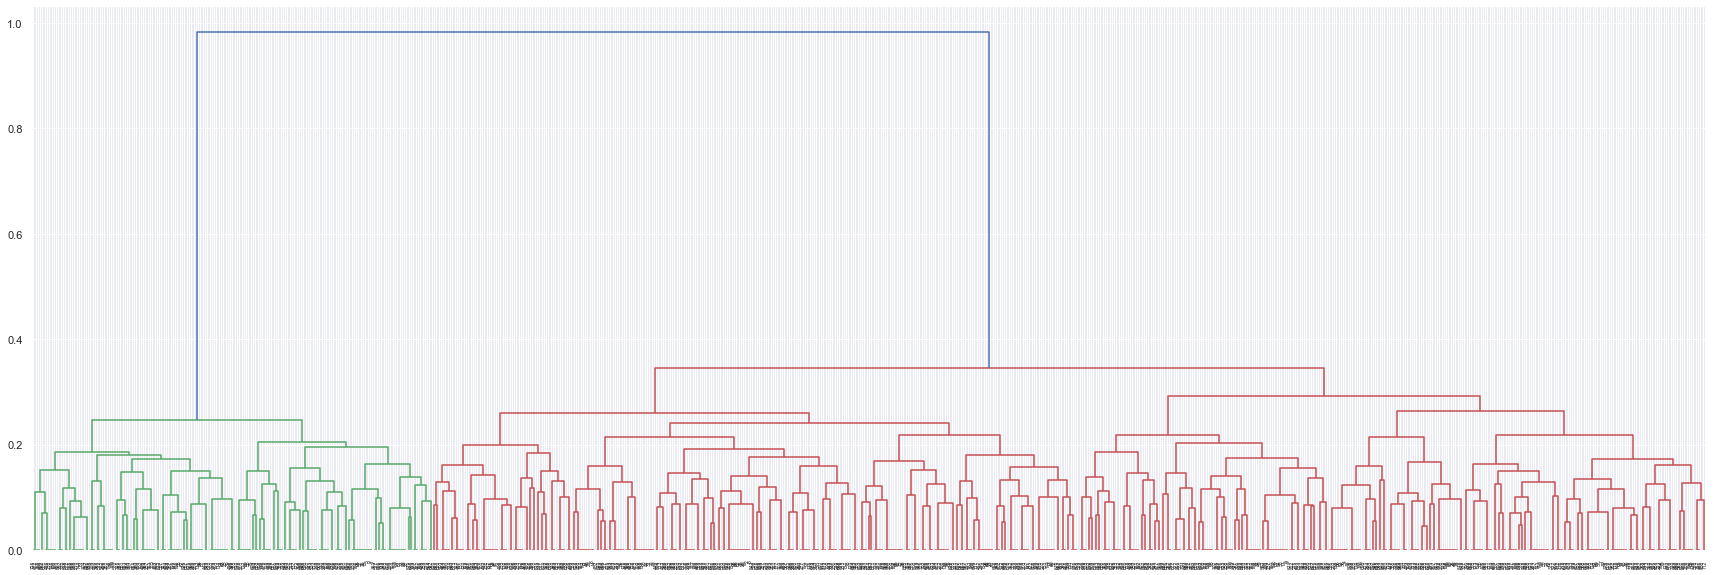

In [26]:
sns.set(rc={'figure.figsize':(30, 10)})

model = AgglomerativeClustering(distance_threshold=0, affinity='precomputed', n_clusters=None, linkage='complete')
model.fit(X)

counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
counts[i] = current_count
linkage_matrix = np.column_stack([model.children_, model.distances_,
                                          counts]).astype(float)
dendrogram(linkage_matrix)

На картинке (внизу текста) видно четкое деление на кластеры. Проверим, что в этих кластерах 

In [27]:
# выделение кластеров

df['cluster'] = fcluster(linkage_matrix, 0.1, criterion='distance')
print(f"Количество уникальных кластеров: {df['cluster'].nunique()}")
df['cluster'].value_counts()

Количество уникальных кластеров: 112


<ipython-input-27-bea7aa6b2b6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = fcluster(linkage_matrix, 0.1, criterion='distance')


103    19
91     15
58     14
31     14
108    13
       ..
33      2
35      2
17      1
34      1
94      1
Name: cluster, Length: 112, dtype: int64

In [28]:
df[df['cluster'] == 31].Title.values

array(["Women's employment patterns during the U.S. inter-war period: A comparison of two states",
       'Margaret G. Reid: Life and achievements',
       'Some Comments on the Role of Lesbianism in Feminist Economic Transformation',
       'Working Time as Gendered Time', 'Children as Economic Agents',
       "India's New Economic Policy of 1991 and its Impact on Women's Poverty and AIDS",
       'Poverty Within Households: Measuring Gender Differences Using Nonmonetary Indicators',
       'All the Lesbian Mothers are Coupled, all the Single Mothers are Straight, and all of us are Tired: Reflections on being a Single Lesbian Mom',
       'Toward a Critical Theory of Untidy Geographies: The Spatiality of Emotions in Consumption and Production',
       "Migrant Women, Care Work, and Women's Employment in Greece",
       'Poor Economics: A Radical Rethinking of the Way to Fight Global Poverty',
       'Lags and Leads in Life Satisfaction in Korea: When Gender Matters',
       "Women's W

Получилось выделить основные темы и направления. 

#Abstarct per year

In [29]:
grouped_per_year = df.groupby('Year')['lemmatized_tokens','lemmatized_text'].sum().reset_index()
year_count = df.groupby('Year')['Abstract'].count().reset_index()

grouped_per_year['freq'] = grouped_per_year['lemmatized_tokens'].apply(Counter)
grouped_per_year['total_abs'] = year_count['Abstract']

year_count = dict(zip(year_count['Year'], year_count['Abstract']))

<ipython-input-29-c221bfe27e79>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_per_year = df.groupby('Year')['lemmatized_tokens','lemmatized_text'].sum().reset_index()


In [30]:
grouped_per_year

,Year,lemmatized_tokens,lemmatized_text,freq,total_abs
0,1995,"[feminist, research, often, perceived, le, obj...",feminist research often perceived le objective...,"{'feminist': 23, 'research': 12, 'often': 3, '...",32
1,1996,"[neoclassical, theory, posit, undifferentiated...",neoclassical theory posit undifferentiated eco...,"{'neoclassical': 3, 'theory': 6, 'posit': 2, '...",24
2,1997,"[highlighting, problem, posed, unitary, concep...",highlighting problem posed unitary conceptuali...,"{'highlighting': 1, 'problem': 1, 'posed': 1, ...",24
3,1998,"[social, security, reform, high, agenda, many,...",social security reform high agenda many govern...,"{'social': 8, 'security': 4, 'reform': 2, 'hig...",27
4,1999,"[economic, reform, program, implemented, centr...",economic reform program implemented central am...,"{'economic': 24, 'reform': 1, 'program': 3, 'i...",29
5,2000,"[swedish, welfare, state, usually, considered,...",swedish welfare state usually considered woman...,"{'swedish': 2, 'welfare': 8, 'state': 11, 'usu...",21
6,2001,"[conventional, method, analysis, poverty, assu...",conventional method analysis poverty assume re...,"{'conventional': 1, 'method': 2, 'analysis': 5...",17
7,2002,"[policy, maker, increasingly, rely, theory, so...",policy maker increasingly rely theory social c...,"{'policy': 17, 'maker': 2, 'increasingly': 1, ...",22
8,2003,"[article, outline, pilot, program, undertaken,...",article outline pilot program undertaken ass a...,"{'article': 4, 'outline': 2, 'pilot': 2, 'prog...",22
9,2004,"[paper, challenge, idea, social, clause, enfor...",paper challenge idea social clause enforce glo...,"{'paper': 15, 'challenge': 1, 'idea': 2, 'soci...",21


,Year,token,freq
0,1995,gender,0.656250
1,1996,gender,0.875000
2,1997,gender,0.458333
3,1998,gender,1.074074
4,1999,gender,0.275862
5,2000,gender,1.142857
6,2001,gender,0.705882
7,2002,gender,1.681818
8,2003,gender,0.727273
9,2004,gender,0.238095


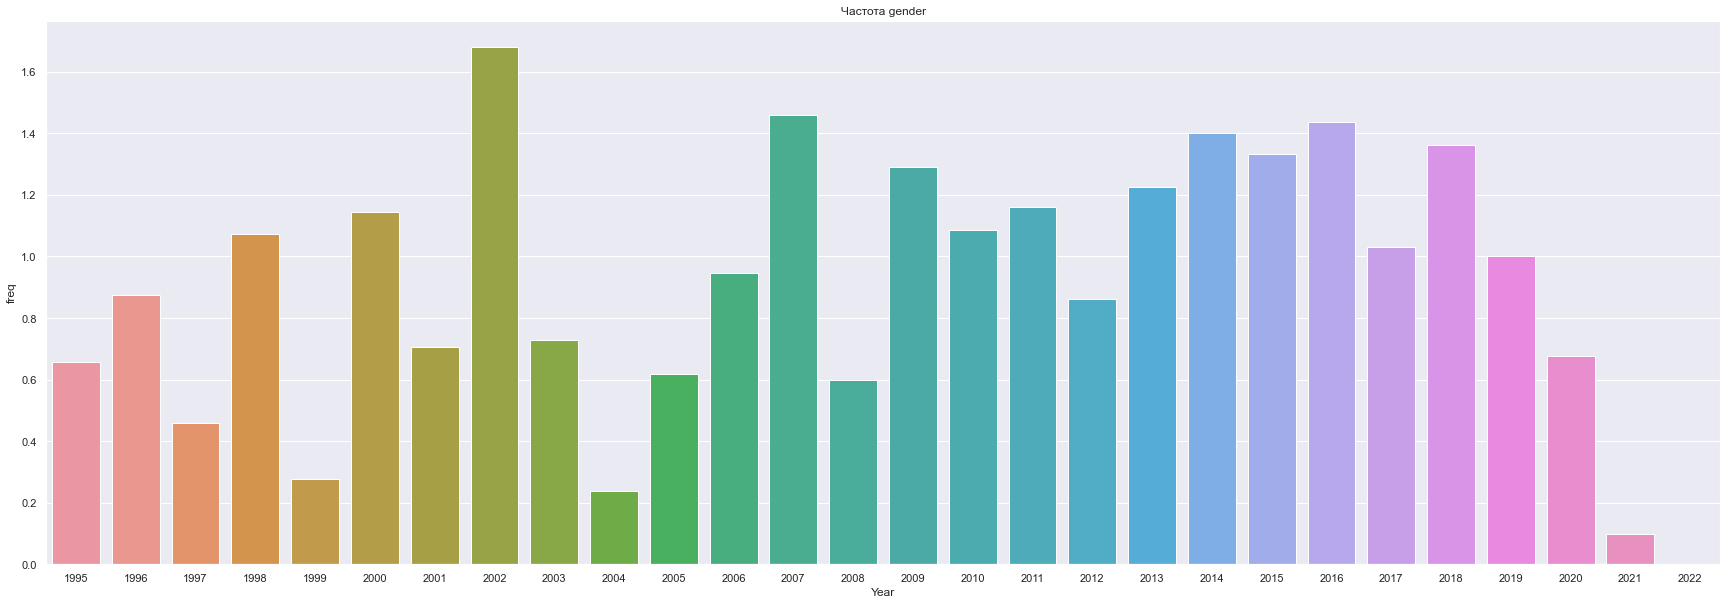

In [31]:
def get_token_freq_data(token, grouped_df, year_count):
    result = []
    for i, row in grouped_df.iterrows():
        if token in row.freq:
            result.append((row.Year, token, row.freq[token] / year_count[row.Year]))
        else: 
            result.append((row.Year, token, 0))
    result = pd.DataFrame(result, columns=['Year', 'token', 'freq'])
    sns.barplot(x="Year", y="freq", data=result).set_title(f'Частота {token}')
    return result
get_token_freq_data('gender', grouped_per_year, year_count)

In [32]:
grouped_per_year['lemmatized_text'][0]

'feminist research often perceived le objective conventional research ground latter value-neutral former essay show major problem familiar standard maximizing objectivity permit conclusion weak resource detecting widespread cultural assumption value interest androcentric one feminist work draw attention good method work identifying cultural value differ researcher research community however since androcentric value often culture-wide something rigorous conventional good method evidently needed researcher able identify thus feminist research introduce political assumption value interest research field otherwise value-neutral identifies one already rejecting debilitating relativist stance usually seen alternative conventional standard maximizing objectivity feminist thought increase objectivity research essay review recent argument conventional feminist philosophy history support analysis show lead construction stronger standard objectivity conventional weak objectivity dependent upon ne

In [33]:
grouped_per_year.freq[0]

Counter({'feminist': 23,
         'research': 12,
         'often': 3,
         'perceived': 1,
         'le': 4,
         'objective': 1,
         'conventional': 7,
         'ground': 2,
         'latter': 2,
         'value-neutral': 2,
         'former': 1,
         'essay': 6,
         'show': 2,
         'major': 2,
         'problem': 4,
         'familiar': 2,
         'standard': 5,
         'maximizing': 2,
         'objectivity': 6,
         'permit': 1,
         'conclusion': 6,
         'weak': 2,
         'resource': 1,
         'detecting': 1,
         'widespread': 1,
         'cultural': 3,
         'assumption': 8,
         'value': 7,
         'interest': 5,
         'androcentric': 4,
         'one': 4,
         'work': 39,
         'draw': 1,
         'attention': 5,
         'good': 5,
         'method': 3,
         'identifying': 2,
         'differ': 1,
         'researcher': 3,
         'community': 1,
         'however': 5,
         'since': 3,
         'cultu

 Посмотрим изменения контекста по годам

In [34]:
grouped_per_year['gender_context_freq']=grouped_per_year['lemmatized_text'].apply(lambda x: get_context_freq(x,'gender',window=4))
grouped_per_year

,Year,lemmatized_tokens,lemmatized_text,freq,total_abs,gender_context_freq
0,1995,"[feminist, research, often, perceived, le, obj...",feminist research often perceived le objective...,"{'feminist': 23, 'research': 12, 'often': 3, '...",32,{}
1,1996,"[neoclassical, theory, posit, undifferentiated...",neoclassical theory posit undifferentiated eco...,"{'neoclassical': 3, 'theory': 6, 'posit': 2, '...",24,{}
2,1997,"[highlighting, problem, posed, unitary, concep...",highlighting problem posed unitary conceptuali...,"{'highlighting': 1, 'problem': 1, 'posed': 1, ...",24,{}
3,1998,"[social, security, reform, high, agenda, many,...",social security reform high agenda many govern...,"{'social': 8, 'security': 4, 'reform': 2, 'hig...",27,{}
4,1999,"[economic, reform, program, implemented, centr...",economic reform program implemented central am...,"{'economic': 24, 'reform': 1, 'program': 3, 'i...",29,{}
5,2000,"[swedish, welfare, state, usually, considered,...",swedish welfare state usually considered woman...,"{'swedish': 2, 'welfare': 8, 'state': 11, 'usu...",21,{}
6,2001,"[conventional, method, analysis, poverty, assu...",conventional method analysis poverty assume re...,"{'conventional': 1, 'method': 2, 'analysis': 5...",17,{}
7,2002,"[policy, maker, increasingly, rely, theory, so...",policy maker increasingly rely theory social c...,"{'policy': 17, 'maker': 2, 'increasingly': 1, ...",22,{}
8,2003,"[article, outline, pilot, program, undertaken,...",article outline pilot program undertaken ass a...,"{'article': 4, 'outline': 2, 'pilot': 2, 'prog...",22,{}
9,2004,"[paper, challenge, idea, social, clause, enfor...",paper challenge idea social clause enforce glo...,"{'paper': 15, 'challenge': 1, 'idea': 2, 'soci...",21,{}


In [35]:
get_context_freq(grouped_per_year['lemmatized_text'],'gender')

{'crusoe': 1,
 'used': 5,
 'represent': 2,
 'discipline': 1,
 'deal': 2,
 'issue': 12,
 'analysis': 30,
 'seven': 1,
 'assumption': 5,
 'regarding': 3,
 'latin': 2,
 'america': 3,
 'alone': 1,
 'inadequate': 2,
 'development': 19,
 'specific': 5,
 'policyessay': 1,
 'argues': 6,
 'sexuality': 5,
 'analytical': 3,
 'category': 4,
 'economics': 12,
 'important': 10,
 'norm': 22,
 'family': 8,
 'legal': 3,
 'research': 10,
 'strategy': 2,
 'studying': 2,
 'division': 19,
 'labor': 39,
 'one': 13,
 'policy': 29,
 'role': 15,
 'offered': 3,
 'woman': 53,
 'german': 2,
 'line': 2,
 'developing': 2,
 'world': 11,
 'ratio': 4,
 'literacy': 1,
 'divided': 1,
 'gap': 108,
 'education': 17,
 'enhances': 1,
 'sex': 5,
 'advance': 1,
 'failed': 1,
 'aggregate': 3,
 'economic': 28,
 'examines': 14,
 'explores': 10,
 'androcentric': 2,
 'character': 1,
 'nature': 2,
 'human': 6,
 'agency': 1,
 'class': 16,
 'life': 4,
 'illuminate': 1,
 'complex': 3,
 'interaction': 4,
 'finding': 12,
 'suggest': 10,

In [36]:
sorted_tokens1 = sorted(grouped_per_year.freq[0].items(), key=lambda x: x[1], reverse=True)

In [37]:
sorted_tokens1

[('woman', 52),
 ('work', 39),
 ('family', 30),
 ('feminist', 23),
 ('paper', 23),
 ('gender', 21),
 ('policy', 21),
 ('child', 19),
 ('economic', 18),
 ('labor', 17),
 ('economist', 16),
 ('parent', 14),
 ('would', 14),
 ('economics', 13),
 ('also', 13),
 ('market', 13),
 ('care', 13),
 ('model', 13),
 ('research', 12),
 ('working', 12),
 ('welfare', 12),
 ('increase', 11),
 ('argues', 11),
 ('theory', 11),
 ('household', 10),
 ('social', 10),
 ('education', 10),
 ('life', 10),
 ('earnings', 10),
 ('analysis', 9),
 ('study', 9),
 ('wage', 9),
 ('assumption', 8),
 ('many', 8),
 ('issue', 8),
 ('power', 8),
 ('within', 8),
 ('use', 8),
 ('examines', 8),
 ('benefit', 8),
 ('development', 8),
 ('worker', 8),
 ('difference', 8),
 ('marriage', 8),
 ('gap', 8),
 ('service', 8),
 ('conventional', 7),
 ('value', 7),
 ('support', 7),
 ('concept', 7),
 ('public', 7),
 ('based', 7),
 ('effect', 7),
 ('bargaining', 7),
 ('poor', 7),
 ('hwp', 7),
 ('poverty', 7),
 ('plan', 7),
 ('essay', 6),
 ('obj

#Термины в аннотациях по годам 'gender'

In [38]:
def get_token_freq_data(token, grouped_df, year_count):
    result = []
    for i, row in grouped_df.iterrows():
        if token in row.freq:
            result.append((row.Year, token, row.freq[token] / year_count[row.Year]))
        else: 
            result.append((row.Year, token, 0))
    result = pd.DataFrame(result, columns=['Year', 'token', 'freq'])
    sns.barplot(x="Year", y="freq", data=result).set_title(f'Частота {token}')
    return result
    

,Year,token,freq
0,1995,gender,0.656250
1,1996,gender,0.875000
2,1997,gender,0.458333
3,1998,gender,1.074074
4,1999,gender,0.275862
5,2000,gender,1.142857
6,2001,gender,0.705882
7,2002,gender,1.681818
8,2003,gender,0.727273
9,2004,gender,0.238095


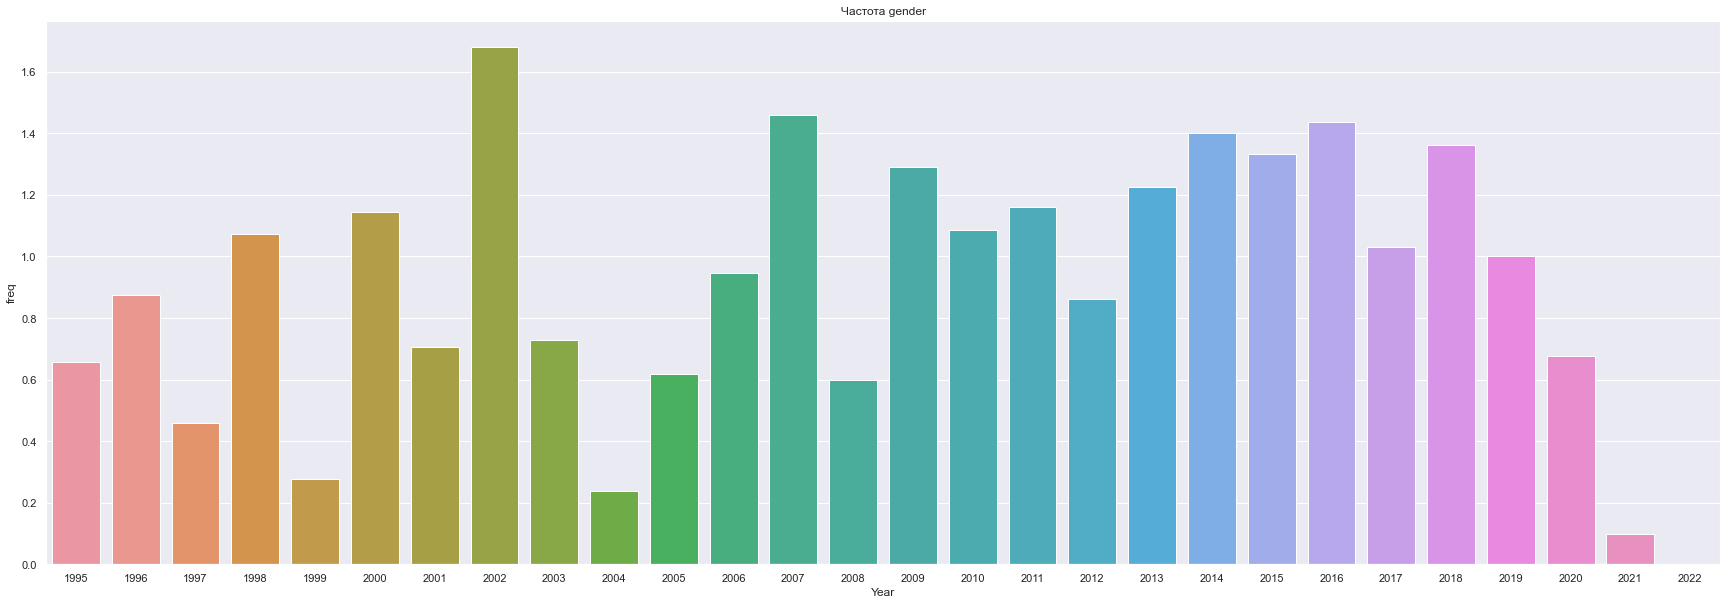

In [39]:
get_token_freq_data('gender', grouped_per_year, year_count)

#Keywords

In [40]:
df.Keywords

1      Feminism,method,objectivity,philosophy of econ...
2      Robinson Crusoe, homo economics,self-sufficien...
3      Peasants,gender,Latin American rural women,con...
4       Caring,labor,family,policy,altruism,reciprocity 
5      Child care,quantitative economics research,job...
                             ...                        
914    Bargaining power,empowerment,entrepreneurship,...
915                                                  NaN
916    Degrowth,care work,commons,decolonial feminism...
917    Self-help group,domestic violence,dowry,India,...
918    Asset,poverty,wealth,Ecuador,feminization of p...
Name: Keywords, Length: 731, dtype: object

In [41]:
df.Keywords.isna().sum()

58

In [42]:
key = df[~df.Keywords.isna()]

In [43]:
key.Keywords=key.Keywords.apply(lambda x:x.lower())

/Users/sofiarebrey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [44]:
keywords_freq=dict(Counter(key.Keywords.str.split(',').explode().tolist()))

In [45]:
sorted_keys = sorted(keywords_freq.items(), key=lambda x: x[1], reverse=True)

In [46]:
sorted_keys

[('gender', 143),
 ('gender inequality', 30),
 ('women', 27),
 ('employment', 26),
 ('poverty', 24),
 ('china', 23),
 ('time use', 22),
 ('feminist economics', 21),
 ('india', 20),
 ('agency', 18),
 ('feminism', 17),
 ('discrimination', 17),
 ('care', 16),
 ('amartya sen', 16),
 ('childcare', 16),
 ('covid-19', 16),
 ('occupational segregation', 15),
 ('development', 15),
 ('labor force participation', 14),
 ('unpaid work', 14),
 ('education', 14),
 ('globalization', 13),
 ('family', 12),
 ('child care', 12),
 ('gender differences', 12),
 ('social norms', 12),
 ('economic development', 12),
 ("women's labor force participation", 12),
 ('race', 11),
 ('labor supply', 11),
 ('gender equality', 11),
 ('lesbian', 10),
 ('fertility', 10),
 ('welfare reform', 10),
 ('gender wage gap', 10),
 ('empowerment', 10),
 ('gay', 9),
 ('economics', 9),
 ('housework', 9),
 ('well-being', 9),
 ('earnings', 9),
 ('culture', 9),
 ('lone mothers', 9),
 ('methodology', 9),
 ('caregiving', 9),
 ('gender role

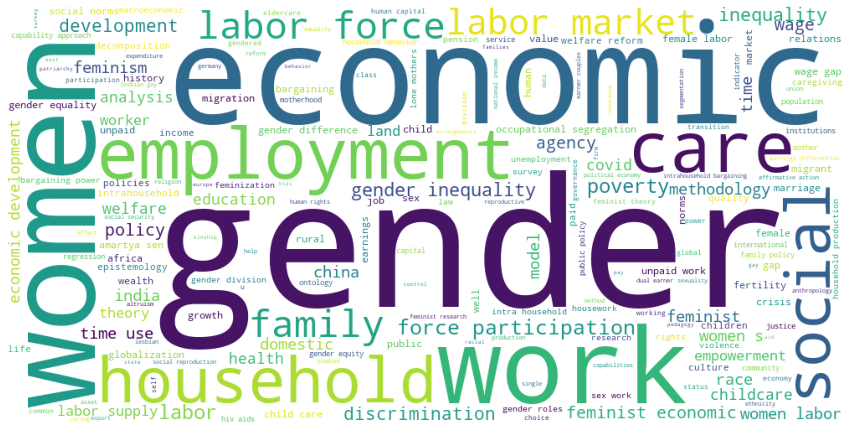

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(key.Keywords.str.split(',').explode().tolist())
wordcloud = WordCloud(background_color="white", width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8),facecolor='white')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

#Keywords какие самые популярные?

In [48]:
key.Keywords=key.Keywords.str.split(',')
key=key.explode('Keywords')

In [49]:
key.groupby('Keywords')['Views'].mean().sort_values(ascending=False)[:50]


Keywords
nonmonetary indicators           31507.500000
history                          21052.333333
social contract                  19756.000000
economic history                 13174.000000
capability approach               9454.500000
trafficking                       9431.500000
export garments                   9103.000000
trust                             8867.000000
reproductive health               8723.000000
job quality                       8723.000000
coronavirus                       8340.000000
democratic governance             8066.000000
pandemic                          7880.000000
gender gap                        7800.000000
sociology                         7439.000000
governance                        7274.000000
evaluation                        7012.000000
public reasoning                  7012.000000
agency                            6608.555556
national leadership               6179.000000
women leaders                     6179.000000
human rights             

In [50]:
groupped_by_keys=key.groupby('Keywords')[['Views','CrossRef','Almetric','WOS','Scopus']].mean().sort_values(by='Views', ascending=False)

In [51]:
groupped_by_keys.sort_values(by='WOS', ascending=False)[:50]

,Views,CrossRef,Almetric,WOS,Scopus
Keywords,,,,,
social contract,19756.000000,980.000000,0.0,899.000000,1146.000000
evaluation,7012.000000,450.000000,0.0,381.000000,463.000000
public reasoning,7012.000000,450.000000,0.0,381.000000,463.000000
capability lists,2933.000000,331.666667,0.0,292.666667,358.333333
martha nussbaum,829.000000,266.000000,0.0,244.000000,299.000000
capabilities,6017.000000,252.000000,0.0,231.200000,294.800000
democracy,2830.666667,176.333333,0.0,215.000000,189.000000
justice,5572.400000,220.000000,0.0,204.400000,255.000000
pierre bourdieu,3923.000000,218.000000,0.0,204.000000,264.000000


In [52]:
df.sort_values(by='CrossRef',ascending=False)[:50]

,Volume,Issue,Issue_title,Year,Article_number,Title,Author1,Author1_Info,Author1_Contacts,Author2,Author2_Info,Author2_Contacts,Author3,Author3_Info,Author3_Contacts,Author4,Author4_Info,Author4_Contacts,Author5,Author5_Info,Author5_Contacts,Author6,Author6_Info,Author6_Contacts,Author7,Author7_Info,Author7_Contacts,Author8,Author8_Info,Author8_Contacts,Author9,Author9_Info,Author9_Contacts,Author10,Author10_Info,Author10_Contacts,Pages,Date_published,DOI,Abstract,Highlights,Keywords,JEL codes,Views,CrossRef,Almetric,References,Citations,WOS,Scopus,Open_access,lemmatized_text,lemmatized_tokens,id,cluster
258,9,2-3,NaN,2003,10090774,CAPABILITIES AS FUNDAMENTAL ENTITLEMENTS: SEN ...,Martha Nussbaum,NaN,rnst Freund Distinguished Service Professor of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33-59,20 Jan 2011,https://doi.org/10.1080/1354570022000077926,Amartya Sen has made a major contribution to t...,NaN,"Amartya Sen,Capabilities,Justice,Gender,Human ...",NaN,19756,980,0,NaN,"Tuula Helne, Tuuli Hirvilammi. (2022) Balancin...",899.0,1146.0,1,amartya sen made major contribution theory soc...,"[amartya, sen, made, major, contribution, theo...",207,68
76,3,1,NaN,1997,10090538,'Bargaining'' and Gender Relations: Within and...,Bina Agarwal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-51,20 Jan 2011,https://doi.org/10.1080/135457097338799,Highlighting the problems posed by a ''unitary...,NaN,"Bargaining Models,Bargaining Power,Gender Rela...",NaN,7341,696,0,"Abdullah, Tahrunnessa and Sondra A. Zeidenstei...","Cathy Rozel Farnworth, Preeti Bharati, Vijesh ...",0.0,797.0,1,highlighting problem posed unitary conceptuali...,"[highlighting, problem, posed, unitary, concep...",56,12
259,9,2-3,NaN,2003,10090784,SEN'S CAPABILITY APPROACH AND GENDER INEQUALIT...,Ingrid Robeyns,NaN,"Department of Political Science , University o...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61-92,20 Jan 2011,https://doi.org/10.1080/1354570022000078024,This paper investigates how Amartya Sen's capa...,NaN,"Amartya Sen,Martha Nussbaum,Capability Approac...",NaN,1134,532,0,NaN,Karen Whalley Hammell. (2022) Securing occupat...,488.0,598.0,1,paper investigates amartya sen capability appr...,"[paper, investigates, amartya, sen, capability...",208,98
291,10,3,NaN,2004,10058384,"Capabilities, Lists, and Public Reason: Contin...",Amartya Sen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77-80,14 Nov 2008,https://doi.org/10.1080/1354570042000315163,Amartya Sen addresses the question why he is d...,NaN,"Capability approach,capability lists,democracy...","JEL Codes: D63, I3, I31",7012,450,0,Dreze JeanSen Amartya1989Hunger and Public Act...,"Megan Devonald, Nicola Jones, Abreham Iyasu Ge...",381.0,463.0,0,amartya sen address question disinclined provi...,"[amartya, sen, address, question, disinclined,...",237,87
274,10,1,NaN,2004,10058407,Comparing Care Regimes in Europe,Francesca Bettio,NaN,NaN,Janneke Plantenga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85-113,14 Nov 2008,https://doi.org/10.1080/1354570042000198245,"Throughout Europe, the family is still an impo...",NaN,"Families,Europe,social policy,childcare,elderl...","JEL Codes: I38, J13, J16",505,363,0,Abramovici Gérard2002Social Protection: Expend...,"Sabrina Marchetti, Giulia Garofalo Geymonat, A...",357.0,402.0,0,throughout europe family still important provi...,"[throughout, europe, family, still, important,...",221,57
439,15,3,"Inequality, Development, and Growth",2009,389482,The Impact of Gender Inequality in Education a...,Stephan Klasen,NaN,"Department of Economics , University of Göttin...",Francesca Lamanna,NaN,"World Bank Group , 1818H Street, NW, Washingto...",NaN,NaN,NaN,Na

In [53]:
key

,Volume,Issue,Issue_title,Year,Article_number,Title,Author1,Author1_Info,Author1_Contacts,Author2,Author2_Info,Author2_Contacts,Author3,Author3_Info,Author3_Contacts,Author4,Author4_Info,Author4_Contacts,Author5,Author5_Info,Author5_Contacts,Author6,Author6_Info,Author6_Contacts,Author7,Author7_Info,Author7_Contacts,Author8,Author8_Info,Author8_Contacts,Author9,Author9_Info,Author9_Contacts,Author10,Author10_Info,Author10_Contacts,Pages,Date_published,DOI,Abstract,Highlights,Keywords,JEL codes,Views,CrossRef,Almetric,References,Citations,WOS,Scopus,Open_access,lemmatized_text,lemmatized_tokens,id,cluster
1,1,1,NaN,1995,9689204,Can feminist thought make economics more objec...,Sandra Harding,NaN,"Departments of Philosophy, University of Delaw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7-32,18 Jun 2010,https://doi.org/10.1080/714042212,Feminist research is often perceived to be les...,NaN,feminism,NaN,467,47,0,NaN,"Sarah Averi Albala, Frida Kasteng, Arne Hennin...",0.0,87.0,1,feminist research often perceived le objective...,"[feminist, research, often, perceived, le, obj...",0,22
1,1,1,NaN,1995,9689204,Can feminist thought make economics more objec...,Sandra Harding,NaN,"Departments of Philosophy, University of Delaw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7-32,18 Jun 2010,https://doi.org/10.1080/714042212,Feminist research is often perceived to be les...,NaN,method,NaN,467,47,0,NaN,"Sarah Averi Albala, Frida Kasteng, Arne Hennin...",0.0,87.0,1,feminist research often perceived le objective...,"[feminist, research, often, perceived, le, obj...",0,22
1,1,1,NaN,1995,9689204,Can feminist thought make economics more objec...,Sandra Harding,NaN,"Departments of Philosophy, University of Delaw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7-32,18 Jun 2010,https://doi.org/10.1080/714042212,Feminist research is often perceived to be les...,NaN,objectivity,NaN,467,47,0,NaN,"Sarah Averi Albala, Frida Kasteng, Arne Hennin...",0.0,87.0,1,feminist research often perceived le objective...,"[feminist, research, often, perceived, le, obj...",0,22
1,1,1,NaN,1995,9689204,Can feminist thought make economics more objec...,Sandra Harding,NaN,"Departments of Philosophy, University of Delaw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7-32,18 Jun 2010,https://doi.org/10.1080/714042212,Feminist research is often perceived to be les...,NaN,philosophy of economics,NaN,467,47,0,NaN,"Sarah Averi Albala, Frida Kasteng, Arne Hennin...",0.0,87.0,1,feminist research often perceived le objective...,"[feminist, research, often, perceived, le, obj...",0,22
1,1,1,NaN,1995,9689204,Can feminist thought make economics more objec...,Sandra Harding,NaN,"Departments of Philosophy, University of Delaw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7-32,18 Jun 2010,https://doi.org/10.1080/714042212,Feminist research is often perceived to be les...,NaN,relativism,NaN,467,47,0,NaN,"Sarah Averi Albala, Frida Kasteng, Arne Hennin...",0.0,87.0,1,feminist research often perceived le objective...,"[feminist, research, often, perceived, le, obj...",0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,28,1,NaN,2022,1995019,A Gendered Analysis of Individual-Level Asset ...,Boaz Anglade,Boaz Anglade is Postdoctoral Researcher at the...,a University of Florida – Food and Resource Ec...,Pilar Useche,Pilar Useche is Associate Professor of Latin A...,c University of Florida – Center for Latin Ame...,Carmen Diana Deere,Carmen Diana Deere is Distinguished Professor ...,c Universi

Посмотреть изменение тем по годам по ключевым словам

#Authors

In [54]:
df.Author1.value_counts()

Günseli Berik                 7
Siobhan Austen                6
Naila Kabeer                  6
Nancy Folbre                  6
Elissa Braunstein             5
                             ..
Yun-Ae Yi                     1
Malathy Duraisamy             1
Beatrice Zucca Micheletto     1
Clara Mi Young Park           1
Contributors: Rajeev Patel    1
Name: Author1, Length: 576, dtype: int64

In [55]:
df.Author2.value_counts()

Xiao-yuan Dong               10
Gale Summerfield              4
Nancy Folbre                  4
Irene van Staveren            4
Emel Memiş                    3
                             ..
Janelle Jones                 1
Jane Waldfogel                1
Ana Claudia Polato e Fava     1
Rita Ismaylov                 1
Astghik Mavisakalyan          1
Name: Author2, Length: 322, dtype: int64

In [56]:
df.Author3.value_counts()

Yana van der Meulen Rodgers    3
Xiao-yuan Dong                 2
José Alberto Molina            2
Stephanie Seguino              2
Himmat Zu'bi                   2
                              ..
Scholastica Ngozi Atata        1
Julia Arnold                   1
Brian Linneker                 1
Emily Thomson                  1
Zhenzhen Zheng                 1
Name: Author3, Length: 145, dtype: int64

In [57]:
df.Author4.value_counts()

Rachel Busbridge                  2
Yaohui Zhao                       2
Brian P. McCall                   1
Krisztina Majoros Contributor     1
Ayala Wineman                     1
Charlotte Ray                     1
Wang Zhili                        1
Mohammad Amin                     1
Hazel Malapit                     1
Lennart Flood                     1
Scott D. Rozelle                  1
Gemma Connell                     1
Tom Weisskopf                     1
Alina Machado                     1
Kim Marie Mcgoldrick              1
Elizabeth Anderson                1
Anouka van Eerdewijk              1
Timothy M Smeeding Contributor    1
Diane Elson                       1
Sara Duerto-Valero                1
Sandra Müllbacher                 1
Hema Swaminathan                  1
Nina Isakova                      1
Ranita Sandi                      1
Burça Kızılırmak                  1
Randy Walld                       1
Tineke A. Abma                    1
Kathryn Falb                

In [58]:
df.Author5.value_counts()

Ernest Tom Ndomahina                    1
Jean Shackelford                        1
the Women's Committee of One Hundred    1
Jane Humphries                          1
Andrew D. Mason                         1
Maria Strydom                           1
Elizabeth Hull                          1
Contributor Leigh S. Brownhill          1
Zachary Catanzarite                     1
Julia Gilroy                            1
Andrea Pető Contributor                 1
Markus Goldstein                        1
Susanna Sandström Contributor           1
Petra Verdonk                           1
Name: Author5, dtype: int64

In [59]:
author=df[['Author1', 'Author1_Info', 'Author1_Contacts']]

In [60]:
groupped_author1=author.groupby('Author1')[['Author1_Info', 'Author1_Contacts']].min()

In [ ]:
author=df[['Author1', 'Author1_Info', 'Author1_Contacts']]

In [95]:
df.columns

Index(['Volume', 'Issue', 'Issue_title', 'Year', 'Article_number', 'Title',
       'Author1', 'Author1_Info', 'Author1_Contacts', 'Author2',
       'Author2_Info', 'Author2_Contacts', 'Author3', 'Author3_Info',
       'Author3_Contacts', 'Author4', 'Author4_Info', 'Author4_Contacts',
       'Author5', 'Author5_Info', 'Author5_Contacts', 'Author6',
       'Author6_Info', 'Author6_Contacts', 'Author7', 'Author7_Info',
       'Author7_Contacts', 'Author8', 'Author8_Info', 'Author8_Contacts',
       'Author9', 'Author9_Info', 'Author9_Contacts', 'Author10',
       'Author10_Info', 'Author10_Contacts', 'Pages', 'Date_published', 'DOI',
       'Abstract', 'Highlights', 'Keywords', 'JEL codes', 'Views', 'CrossRef',
       'Almetric', 'References', 'Citations', 'WOS', 'Scopus', 'Open_access',
       'lemmatized_text', 'lemmatized_tokens', 'id', 'cluster', 'country',
       'country1', 'country2', 'country3', 'country4', 'country5', 'country6',
       'country7', 'country8'],
      dtype='objec

In [ ]:
df=['Author1', 'Author1_Info', 'Author1_Contacts', 'Author2',
       'Author2_Info', 'Author2_Contacts', 'Author3', 'Author3_Info',
       'Author3_Contacts', 'Author4', 'Author4_Info', 'Author4_Contacts',
       'Author5', 'Author5_Info', 'Author5_Contacts', 'Author6',
       'Author6_Info', 'Author6_Contacts', 'Author7', 'Author7_Info',
       'Author7_Contacts', 'Author8', 'Author8_Info', 'Author8_Contacts',
       'Author9', 'Author9_Info', 'Author9_Contacts', 'Author10',
       'Author10_Info', 'Author10_Contacts'

In [64]:
con

,Author1,Author1_Contacts
0,A. Geske Dijkstra,"Programme of Public Administration , Erasmus U..."
2,Abena D. Oduro,"Department of Economics, University of Ghana, ..."
3,Adryan Wallace,"Department of Politics and Government, Univers..."
6,Ajit Zacharias,"Levy Economics Institute of Bard College , PO ..."
7,Aletheia Donald,"a The World Bank, 1818 H St. NW Washington, DC..."
...,...,...
570,Yun-Ae Yi,"Research Associate, Center for Korean Research..."
571,Yunsun Huh,University of Wisconsin-Green Bay – Democracy ...
572,Zeynep B. Uğur,Ankara Sosyal Bilimler UniversitesiHukumet Mey...
573,Zofia Łapniewska,Research Training Group “Gender as a Category ...


In [65]:
nlp = spacy.load("en_core_web_sm")

def get_loc_with_spacy(text):
    result = []
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == 'GPE':
            result.append(ent.text)
    return result

/Users/sofiarebrey/opt/anaconda3/lib/python3.8/site-packages/spacy/util.py:841: UserWarning: [W094] Model 'en_core_web_sm' (2.2.0) specifies an under-constrained spaCy version requirement: >=2.2.0. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.2.3,<3.3.0
  warnings.warn(warn_msg)


OSError: [E053] Could not read config file from /Users/sofiarebrey/opt/anaconda3/lib/python3.8/site-packages/en_core_web_sm/en_core_web_sm-2.2.0/config.cfg

In [67]:
from nltk.tokenize import word_tokenize

countries = set(pd.read_excel('Country.xlsx')['Country'].apply(lambda x: x.lower()).values)
countries.add('United Kingdom'.lower())
countries.add('Great Britain'.lower())

def get_loc_with_list(text):
    if text:
        tokens = word_tokenize(text.lower())
        bigrams = [' '.join(n) for n in nltk.ngrams(tokens, 2)]
        trigrams = [' '.join(n) for n in nltk.ngrams(tokens, 3)]
        fgrams = [' '.join(n) for n in nltk.ngrams(tokens, 4)]
        tokens = tokens + bigrams + trigrams + fgrams
        for t in tokens:
            if t in countries:
                return t

def sub_uk(country):
    if country == 'great britain' or country == 'united kingdom':
        return 'uk'
    else:
        return country

In [68]:
df['country'] = df['Author1_Contacts'].dropna().apply(get_loc_with_list).apply(sub_uk)

<ipython-input-68-1e8b094b6c4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['Author1_Contacts'].dropna().apply(get_loc_with_list).apply(sub_uk)


In [84]:
df['country1'] = df['Author2_Contacts'].dropna().apply(get_loc_with_list).apply(sub_uk)
df['country2'] = df['Author3_Contacts'].dropna().apply(get_loc_with_list).apply(sub_uk)
df['country3'] = df['Author4_Contacts'].dropna().apply(get_loc_with_list).apply(sub_uk)
df['country4'] = df['Author5_Contacts'].dropna().apply(get_loc_with_list).apply(sub_uk)
df['country5'] = df['Author6_Contacts'].dropna().apply(get_loc_with_list).apply(sub_uk)
df['country6'] = df['Author7_Contacts'].dropna().apply(get_loc_with_list).apply(sub_uk)
df['country7'] = df['Author8_Contacts'].dropna().apply(get_loc_with_list).apply(sub_uk)





<ipython-input-84-6349791b5fe4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country1'] = df['Author2_Contacts'].dropna().apply(get_loc_with_list).apply(sub_uk)
<ipython-input-84-6349791b5fe4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country2'] = df['Author3_Contacts'].dropna().apply(get_loc_with_list).apply(sub_uk)
<ipython-input-84-6349791b5fe4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [88]:
df

,Volume,Issue,Issue_title,Year,Article_number,Title,Author1,Author1_Info,Author1_Contacts,Author2,Author2_Info,Author2_Contacts,Author3,Author3_Info,Author3_Contacts,Author4,Author4_Info,Author4_Contacts,Author5,Author5_Info,Author5_Contacts,Author6,Author6_Info,Author6_Contacts,Author7,Author7_Info,Author7_Contacts,Author8,Author8_Info,Author8_Contacts,Author9,Author9_Info,Author9_Contacts,Author10,Author10_Info,Author10_Contacts,Pages,Date_published,DOI,Abstract,Highlights,Keywords,JEL codes,Views,CrossRef,Almetric,References,Citations,WOS,Scopus,Open_access,lemmatized_text,lemmatized_tokens,id,cluster,country,country1,country2,country3,country4,country5,country6,country7,country8
1,1,1,NaN,1995,9689204,Can feminist thought make economics more objec...,Sandra Harding,NaN,"Departments of Philosophy, University of Delaw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7-32,18 Jun 2010,https://doi.org/10.1080/714042212,Feminist research is often perceived to be les...,NaN,"Feminism,method,objectivity,philosophy of econ...",NaN,467,47,0,NaN,"Sarah Averi Albala, Frida Kasteng, Arne Hennin...",0.0,87.0,1,feminist research often perceived le objective...,"[feminist, research, often, perceived, le, obj...",0,22,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,NaN,1995,9689205,Robinson Crusoe: The quintessential economic man?,Ulla Grapard,NaN,"Department of Economics, Colgate University, 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33-52,18 Jun 2010,https://doi.org/10.1080/714042213,The tale of Robinson Crusoe strikes a responsi...,NaN,"Robinson Crusoe, homo economics,self-sufficien...",NaN,845,19,0,NaN,Nancy Folbre. (2020) Manifold exploitations: t...,0.0,58.0,1,tale robinson crusoe strike responsive chord i...,"[tale, robinson, crusoe, strike, responsive, c...",1,22,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,NaN,1995,9689206,What difference does gender make? Rethinking p...,Carmen Diana Deere,NaN,"Department of Economics, University of Massach...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53-72,18 Jun 2010,https://doi.org/10.1080/714042214,This article argues that gender analysis has c...,NaN,"Peasants,gender,Latin American rural women,con...",NaN,238,30,0,NaN,"Grettel Navas. (2022) ‘If there's no evidence,...",0.0,40.0,1,article argues gender analysis challenged enri...,"[article, argues, gender, analysis, challenged...",2,49,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,NaN,1995,9689207,"""Holding hands at midnight"": The paradox of ca...",Nancy Folbre,NaN,"Department of Economics, University of Massach...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73-92,18 Jun 2010,https://doi.org/10.1080/714042215,This paper puts recent feminist theorizing abo...,NaN,"Caring,labor,family,policy,altruism,reciprocity",NaN,842,145,25,NaN,"Özlem Onaran, Cem Oyvat, Eurydice Fotopoulou. ...",0.0,189.0,1,paper put recent feminist theorizing care with...,"[paper, put, recent, feminist, theorizing, car...",3,22,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,1,NaN,1995,9689208,Child care centers as workplaces,Myra Strober,NaN,"School of Education, Stanford University, Stan...",Suzanne Gerlach-Downie,NaN,"SRI International, 333 Ravenswood Avenue, Menl...",Kenneth Yeager,NaN,"Department of Political Science, San Jose Stat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93-119,18 Jun 2010,https://doi.org/10.1080/714042216,This paper deals with a subject of central int...,NaN,"Child care,quantitative economics research,job...",NaN,73,11,0,NaN,Deborah M. Figart. (2005) Gender as more than ...,0.0,17.0,1,paper deal subject central interest feminist e...,"[paper, deal, subject, central, interest, femi...",4,91,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,

In [85]:
df['country7'].value_counts()

canada    1
Name: country7, dtype: int64

In [87]:
df[df['country7']=='canada']['Title']

328    INTRODUCTION / THE STATUS OF WOMEN ECONOMISTS ...
Name: Title, dtype: object

In [ ]:
country=pd.read_excel('Country.xlsx')

In [ ]:
country_list=country.Country.tolist()

In [ ]:
country_list

In [ ]:
def country_finder(text):
    for country in country_list:
        if country in text:
            return country

con['Country']=con.Author1_Contacts.apply(country_finder)    

In [ ]:
con

In [ ]:
con.Author1_Contacts.str.contains('United States')

In [ ]:
con[con.Author1_Contacts.str.contains('Australia')]

In [ ]:
Авторы: выделить страну, универ, факультет
Посмотреть как менялись авторы по годам
Популярность и автороство
Какие университеты/страны что изучают 
Какие страны изучают какие страны 
